In [55]:
!pip install gym-super-mario-bros nes_py

  Obtaining dependency information for gym-super-mario-bros==7.3.0 from https://files.pythonhosted.org/packages/a0/b8/07460212c2568f78b02995834e7bdc25349e586473919e2983e01b984abf/gym_super_mario_bros-7.3.0-py2.py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.6/198.6 kB 26.3 kB/s eta 0:00:00a 0:00:02
  Attempting uninstall: gym-super-mario-bros
    Found existing installation: gym-super-mario-bros 7.4.0
    Uninstalling gym-super-mario-bros-7.4.0:
      Successfully uninstalled gym-super-mario-bros-7.4.0


In [1]:
import gym_super_mario_bros
from nes_py.wrappers import JoypadSpace
from gym_super_mario_bros.actions import SIMPLE_MOVEMENT
import gym

In [2]:
env = gym.make('SuperMarioBros-v0', apply_api_compatibility=True, render_mode="human")
env = JoypadSpace(env, SIMPLE_MOVEMENT)

/Users/mac/anaconda3/lib/python3.11/site-packages/gym/envs/registration.py:555: UserWarning: WARN: The environment SuperMarioBros-v0 is out of date. You should consider upgrading to version `v3`.
  logger.warn(
/Users/mac/anaconda3/lib/python3.11/site-packages/gym/envs/registration.py:627: UserWarning: WARN: The environment creator metadata doesn't include `render_modes`, contains: ['render.modes', 'video.frames_per_second']
  logger.warn(


In [3]:
env.observation_space.shape

(240, 256, 3)

In [4]:
env.action_space

Discrete(7)

In [5]:
#create a flag - restart the game or not
done = True 

# start the game
env.reset()

#loop through each frame in the game
for step in range(100000):
    action = env.action_space.sample()
    obs, reward, terminated, truncated, info = env.step(action)
    done = terminated or truncated
    #start the game to begin with
    if done:
       env.reset()
# close the game 
env.close()



/Users/mac/anaconda3/lib/python3.11/site-packages/gym/utils/passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):
/Users/mac/anaconda3/lib/python3.11/site-packages/gym_super_mario_bros/smb_env.py:148: RuntimeWarning: overflow encountered in scalar subtract
  return (self.ram[0x86] - self.ram[0x071c]) % 256


KeyboardInterrupt: 

In [10]:
#env.step(1)[4]

## preprocessing the environment

In [31]:
!pip3 install torch torchvision

  Obtaining dependency information for torch from https://files.pythonhosted.org/packages/ad/08/c5e41eb22323db4a52260607598a207a2e1918916ae8201aa7a8ae005fcd/torch-2.3.0-cp311-none-macosx_11_0_arm64.whl.metadata
  Using cached torch-2.3.0-cp311-none-macosx_11_0_arm64.whl.metadata (26 kB)
  Obtaining dependency information for torchvision from https://files.pythonhosted.org/packages/b5/14/c05da13c98f528ba5fd99897320a7684df5dd136ec6faa6a5766f25e4a7e/torchvision-0.18.0-cp311-cp311-macosx_11_0_arm64.whl.metadata
  Using cached torchvision-0.18.0-cp311-cp311-macosx_11_0_arm64.whl.metadata (6.6 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 MB 154.2 kB/s eta 0:00:0000:0100:12
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 86.8 kB/s eta 0:00:0000:0100:01m


In [33]:
!pip3 install torchaudio

  Obtaining dependency information for torchaudio from https://files.pythonhosted.org/packages/51/c8/2034c6a6b203fe79c9df8d8e018bfac989cd718be4b0c36940e1fc691fd0/torchaudio-2.3.0-cp311-cp311-macosx_11_0_arm64.whl.metadata
  Using cached torchaudio-2.3.0-cp311-cp311-macosx_11_0_arm64.whl.metadata (6.4 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 173.4 kB/s eta 0:00:0000:0100:01


In [36]:
!pip install stable-baselines3\[extra\]

  Obtaining dependency information for stable-baselines3[extra] from https://files.pythonhosted.org/packages/06/6a/c3098a78a63b5a48e18c11d80b8c532f8b7785d6abb1329cfe3034572161/stable_baselines3-2.3.2-py3-none-any.whl.metadata
  Obtaining dependency information for gymnasium<0.30,>=0.28.1 from https://files.pythonhosted.org/packages/a8/4d/3cbfd81ed84db450dbe73a89afcd8bc405273918415649ac6683356afe92/gymnasium-0.29.1-py3-none-any.whl.metadata
  Obtaining dependency information for opencv-python from https://files.pythonhosted.org/packages/77/df/b56175c3fb5bc058774bdcf35f5a71cf9c3c5b909f98a1c688eb71cd3b1f/opencv_python-4.9.0.80-cp37-abi3-macosx_11_0_arm64.whl.metadata
  Obtaining dependency information for pygame from https://files.pythonhosted.org/packages/4d/84/5a03c47c76020c4f46354cf8c3f2d7926592c1ff9370f0ad91a3bb577b54/pygame-2.5.2-cp311-cp311-macosx_11_0_arm64.whl.metadata
  Obtaining dependency information for tensorboard>=2.9.1 from https://files.pythonhosted.org/packages/3a/d0/b978

In [5]:
from gym.wrappers import GrayScaleObservation
from stable_baselines3.common.vec_env import VecFrameStack, DummyVecEnv
from matplotlib import pyplot as plt

In [13]:
class NoSeedResetWrapper(gym.Wrapper):
    def reset(self, **kwargs):
        if 'seed' in kwargs:
            kwargs.pop('seed')
        if 'options' in kwargs:
            kwargs.pop('options')
        return self.env.reset(**kwargs)

In [21]:
# create base environment
env = gym.make('SuperMarioBros-v0', apply_api_compatibility=True, render_mode="human")
# simplify the control
env = JoypadSpace(env, SIMPLE_MOVEMENT)

# seed wrapper
env = NoSeedResetWrapper(env)

# grayscale
env = GrayScaleObservation(env, keep_dim=True)
# wrap dummy inside environment
env = DummyVecEnv([lambda: env])
# stack the frames
env = VecFrameStack(env, 4, channels_order='last')

In [22]:
env.seed(42)

[42]

In [120]:
state = env.reset()

In [24]:
import numpy as np

print(type(state))

<class 'numpy.ndarray'>


In [25]:
for i, element in enumerate(state):
    print(f"Element {i}: type: {type(element)}, shape: {np.shape(element)}")

Element 0: type: <class 'numpy.ndarray'>, shape: (240, 256, 4)


In [19]:
image_array = state[0]


In [132]:
action = env.action_space.sample()

# obs, reward, terminated, truncated, info = env.step([action])
state, reward, done, info = env.step([5])

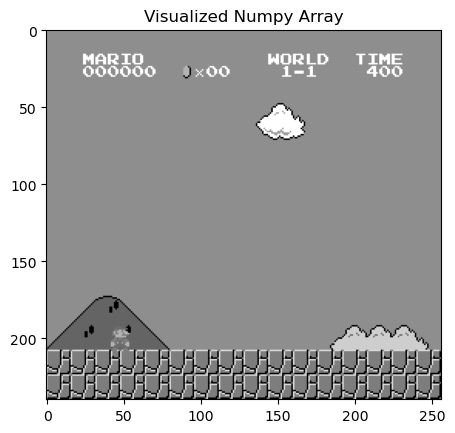

In [104]:
image_array_squeezed = np.squeeze(image_array)

plt.imshow(image_array_squeezed, cmap='gray')  # Use cmap='gray' for a single-channel image
plt.title("Visualized Numpy Array")
plt.show();

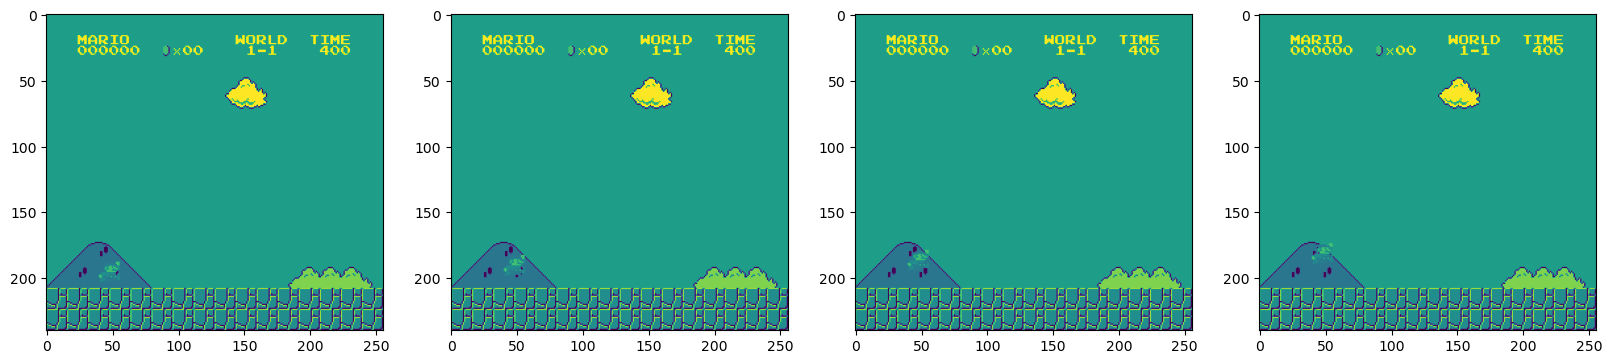

In [133]:
plt.figure(figsize=(20,16))
for idx in range(state.shape[3]):
    plt.subplot(1,4,idx+1)
    plt.imshow(state[0][:,:,idx])
plt.show()


## training RL model

In [134]:
# import os for file path management
import os
# import ppo for algos
from stable_baselines3 import PPO
# import base callback for saving models
from stable_baselines3.common.callbacks import BaseCallback

In [135]:
class TrainAndLoggingCallback(BaseCallback):

    def __init__(self, check_freq, save_path, verbose=1):
        super(TrainAndLoggingCallback, self).__init__(verbose)
        self.check_freq = check_freq
        self.save_path = save_path

    def _init_callback(self):
        if self.save_path is not None:
            os.makedirs(self.save_path, exist_ok=True)

    def _on_step(self):
        if self.n_calls % self.check_freq == 0:
            model_path = os.path.join(self.save_path, 'best_model_{}'.format(self.n_calls))
            self.model.save(model_path)

        return True

In [142]:
CHECKPOINT_DIR = './trainings/'
LOG_DIR = './loggings/'

In [143]:
callback = TrainAndLoggingCallback(check_freq=10000, save_path=CHECKPOINT_DIR)

In [144]:
model = PPO('CnnPolicy', env, verbose=1, tensorboard_log=LOG_DIR, learning_rate=0.000001, 
            n_steps=512) 

Using cpu device
Wrapping the env in a VecTransposeImage.


In [145]:
# train the ai model, this is where the ai model starts to learn
model.learn(total_timesteps=1000000, callback=callback)

Logging to ./loggings/PPO_1


/Users/mac/anaconda3/lib/python3.11/site-packages/gym_super_mario_bros/smb_env.py:148: RuntimeWarning: overflow encountered in scalar subtract
  return (self.ram[0x86] - self.ram[0x071c]) % 256


----------------------------
| time/              |     |
|    fps             | 100 |
|    iterations      | 1   |
|    time_elapsed    | 5   |
|    total_timesteps | 512 |
----------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 17            |
|    iterations           | 2             |
|    time_elapsed         | 59            |
|    total_timesteps      | 1024          |
| train/                  |               |
|    approx_kl            | 1.7624581e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.95         |
|    explained_variance   | -0.0074       |
|    learning_rate        | 1e-06         |
|    loss                 | 176           |
|    n_updates            | 10            |
|    policy_gradient_loss | -3.96e-05     |
|    value_loss           | 462           |
-------------------------------------------
-----

KeyboardInterrupt: 

In [ ]:
model = PPO.load('./train/best_model_1000000')

In [ ]:
state = env.reset()

In [ ]:
# Start the game 
state = env.reset()
# Loop through the game
while True: 
    
    action, _ = model.predict(state)
    state, reward, done, info = env.step(action)
    env.render()